## MPC with Gekko TCLab

TCLab version 0.4.9
Simulated TCLab
Time: 0 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 2 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 4 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.6272
Time: 6 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 8 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 10 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 12 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 14 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 16 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 18 H1: 0.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 20 H1: 80.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 22 H1: 80.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 24 H1: 80.0 H2: 0.0 T1: 20.949499999999997 T2: 20.949499999999997
Time: 26 H1: 80.0 H2: 0.0 T1: 21.2718 T2: 20.949499999

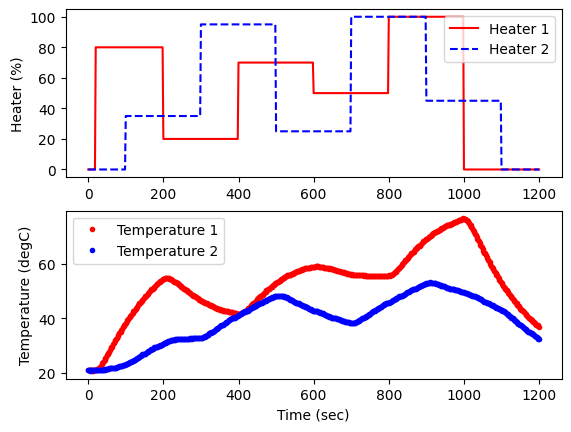

In [3]:
# %load https://apmonitor.com/do/index.php/Main/TCLabF?action=sourceblock&num=3
import numpy as np
import pandas as pd
import tclab
import time
import matplotlib.pyplot as plt

# generate step test data on Arduino
filename = 'tclab_2sec.csv'

# heater steps
Q1d = np.zeros(601)
Q1d[10:100] = 80
Q1d[100:200] = 20
Q1d[200:300] = 70
Q1d[300:400] = 50
Q1d[400:500] = 100
Q1d[500:] = 0

Q2d = np.zeros(601)
Q2d[50:150] = 35
Q2d[150:250] = 95
Q2d[250:350] = 25
Q2d[350:450] = 100
Q2d[450:550] = 45
Q2d[550:] = 0

# Connect to Arduino
a = tclab.TCLabModel()
fid = open(filename,'w')
fid.write('Time,H1,H2,T1,T2\n')
fid.close()

# run step test (20 min)
for i in range(601):
    # set heater values
    a.Q1(Q1d[i])
    a.Q2(Q2d[i])
    print('Time: ' + str(2*i) + \
          ' H1: ' + str(Q1d[i]) + \
          ' H2: ' + str(Q2d[i]) + \
          ' T1: ' + str(a.T1)   + \
          ' T2: ' + str(a.T2))
    # wait 2 seconds
    time.sleep(2)
    fid = open(filename,'a')
    fid.write(str(2*i)+','+str(Q1d[i])+','+str(Q2d[i])+',' \
              +str(a.T1)+','+str(a.T2)+'\n')
    fid.close()
# close connection to Arduino
a.close()

# read data file
data = pd.read_csv(filename)

# plot measurements
plt.figure()
plt.subplot(2,1,1)
plt.plot(data['Time'],data['H1'],'r-',label='Heater 1')
plt.plot(data['Time'],data['H2'],'b--',label='Heater 2')
plt.ylabel('Heater (%)')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(data['Time'],data['T1'],'r.',label='Temperature 1')
plt.plot(data['Time'],data['T2'],'b.',label='Temperature 2')
plt.ylabel('Temperature (degC)')
plt.legend(loc='best')
plt.xlabel('Time (sec)')
plt.savefig('tclab_dyn_2sec.png')

plt.show()

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Identify model
apm 216.21.163.7_gk_model11 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            6
   Constants    :            6
   Variables    :         3628
   Intermediates:            0
   Connections  :           18
   Equations    :         2410
   Residuals    :         2410
 
 Number of state variables:           1220
 Number of total equations: -         1206
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             14
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 ******************

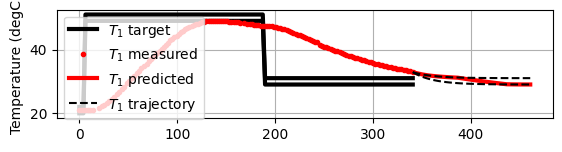

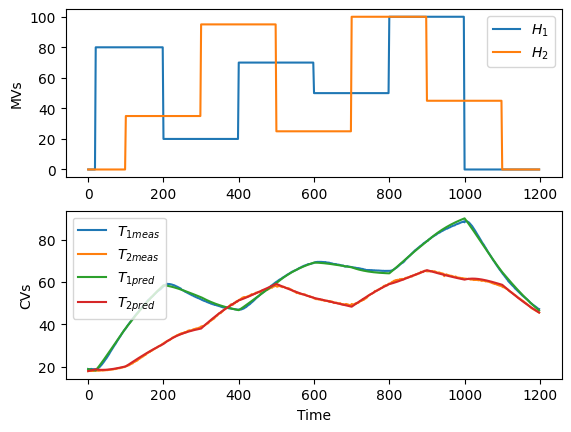

<Figure size 1000x700 with 0 Axes>

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

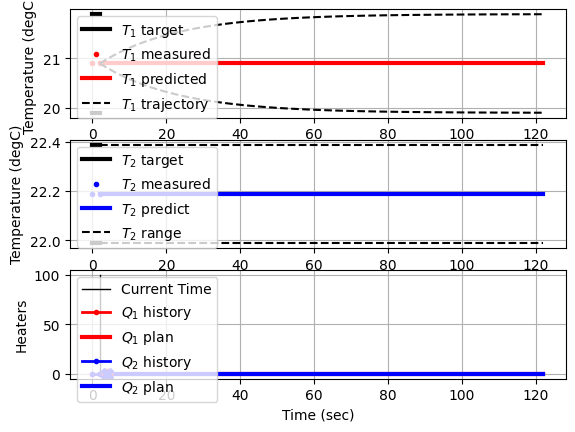

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

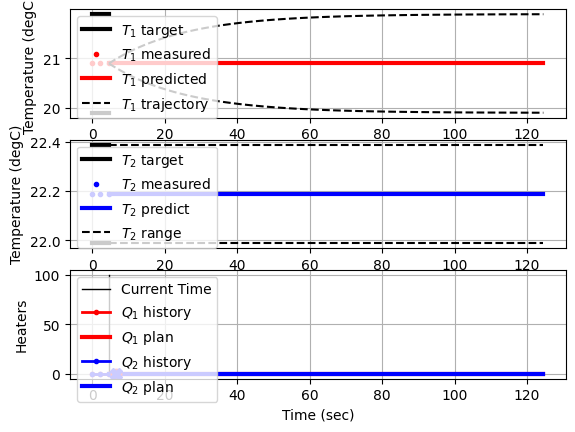

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

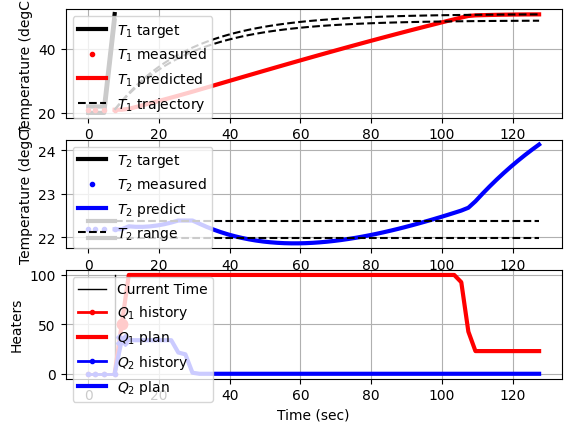

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

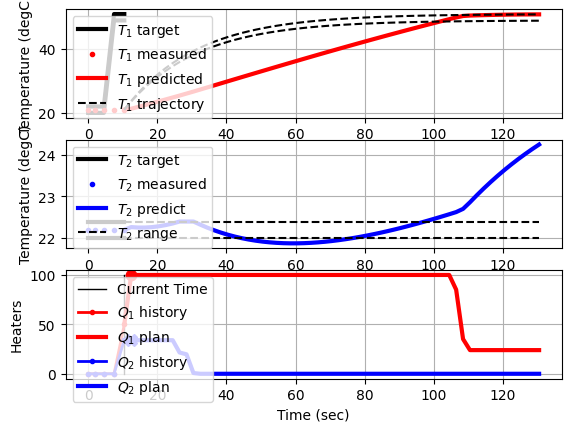

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

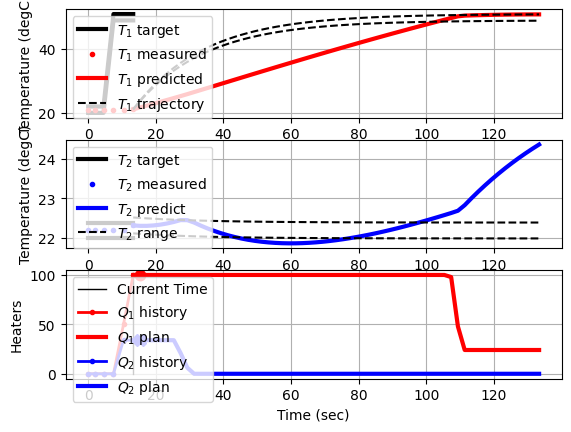

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

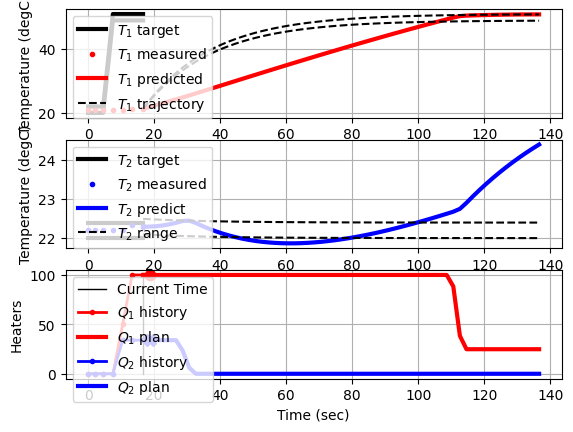

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

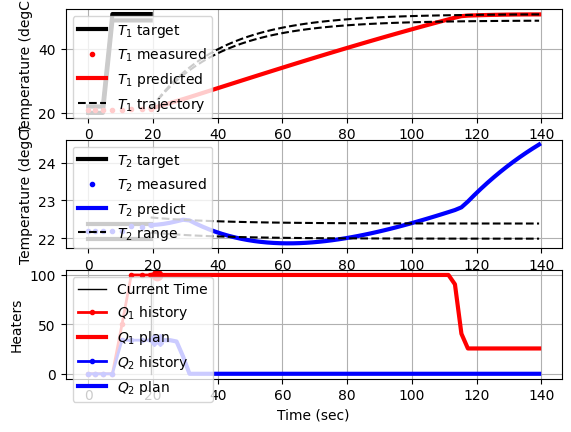

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

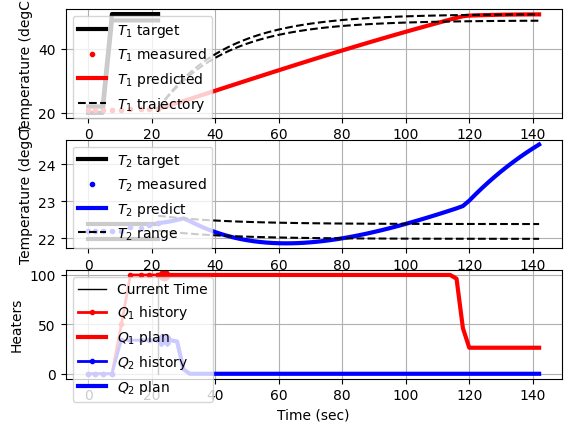

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

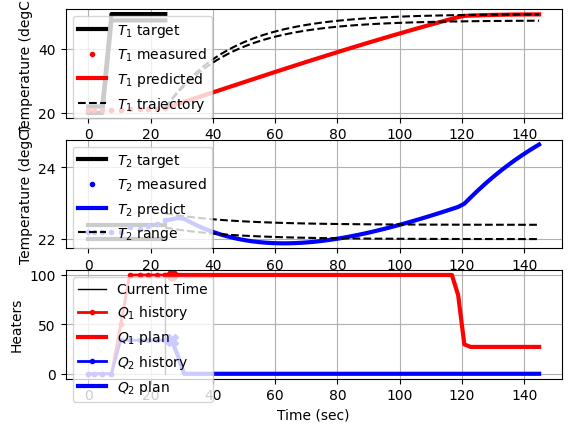

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

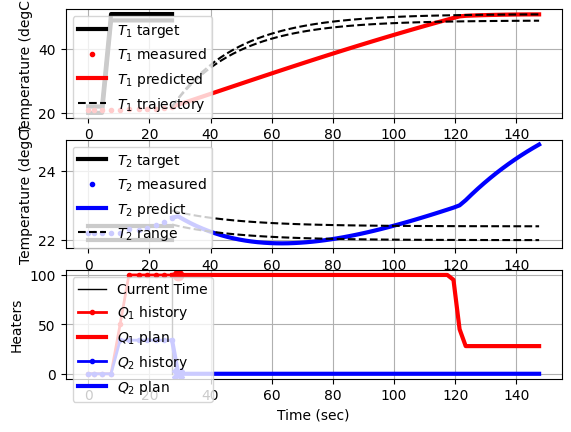

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

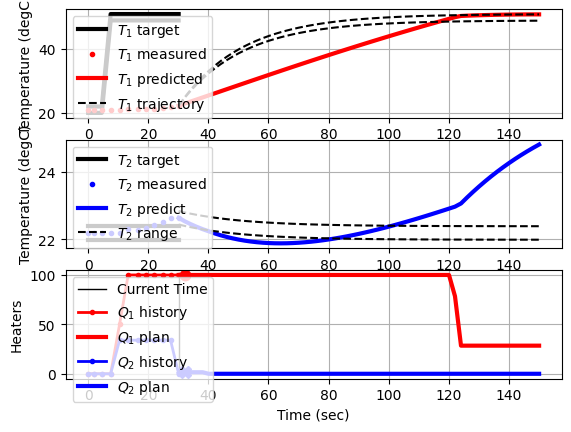

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

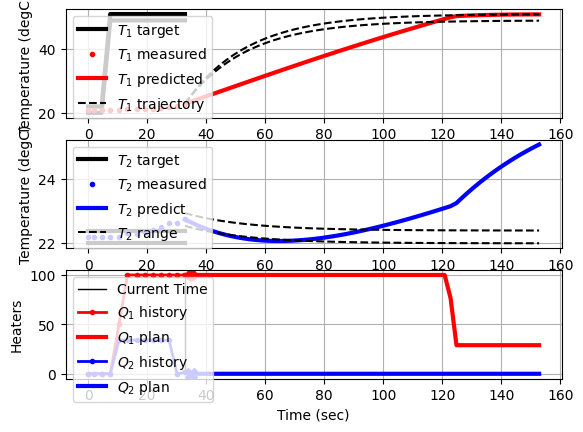

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

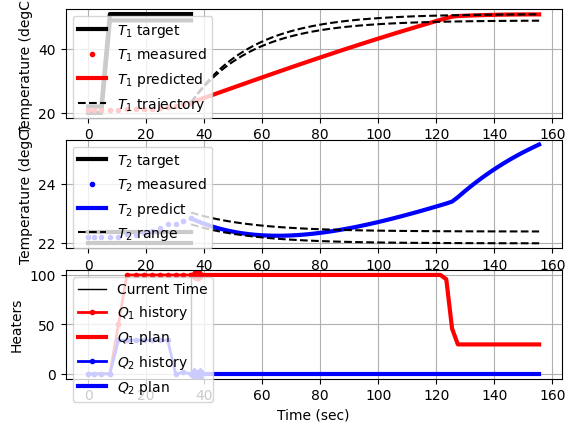

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

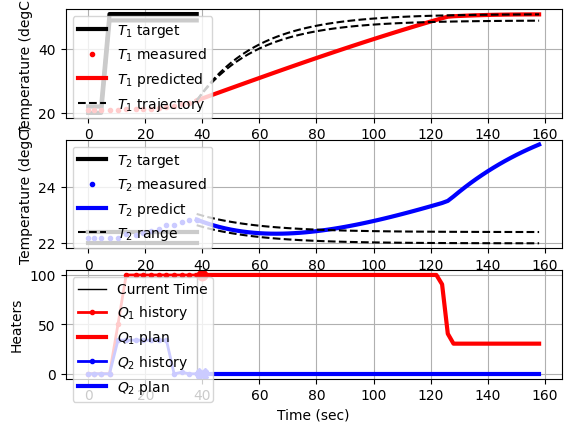

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

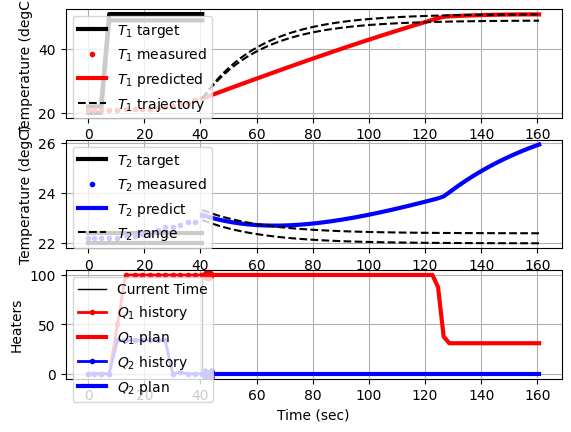

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

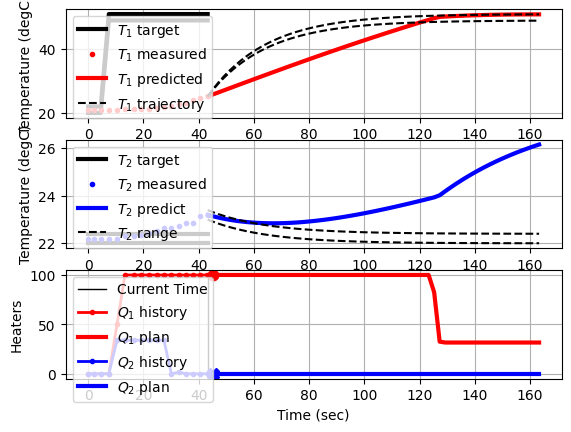

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

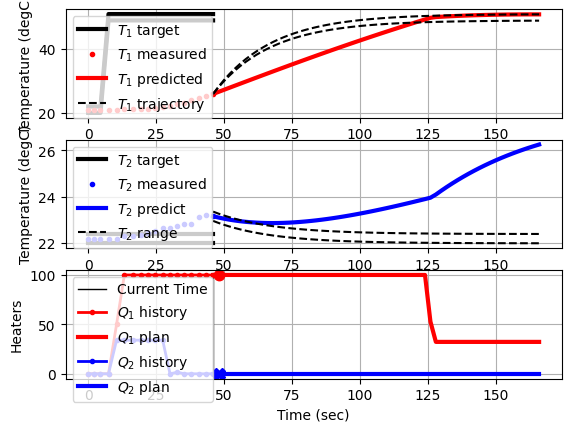

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

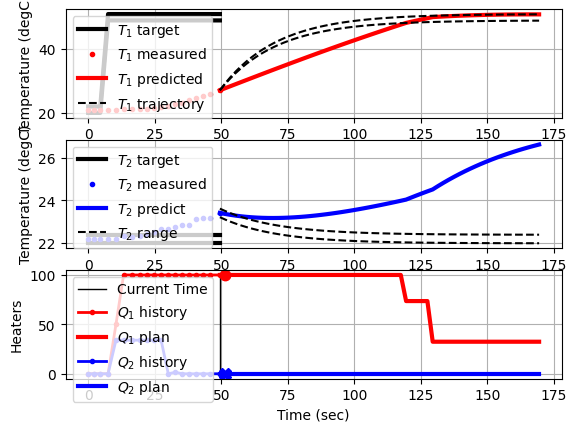

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

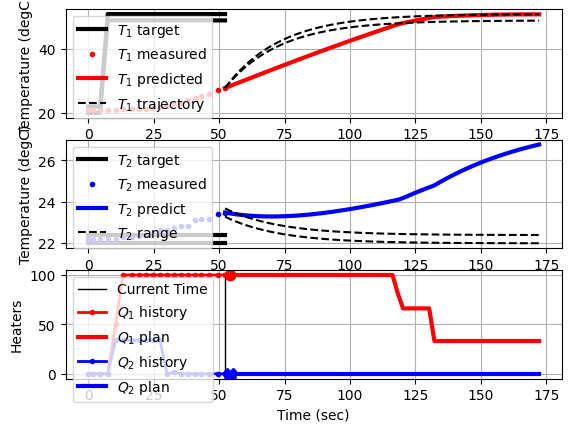

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

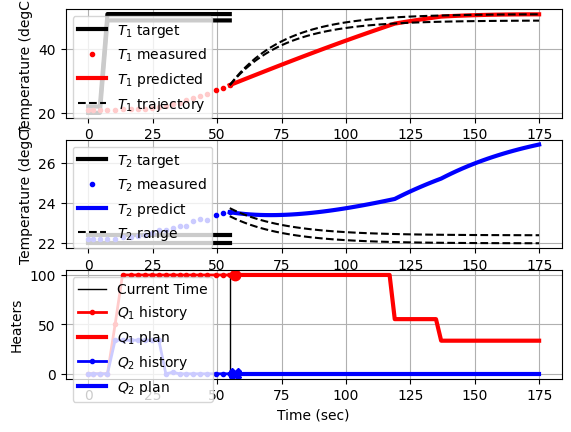

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

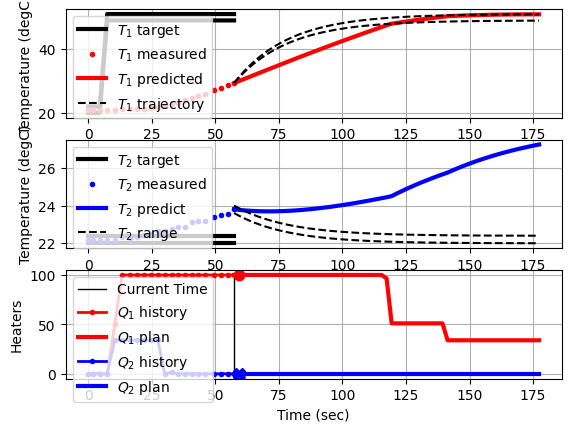

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

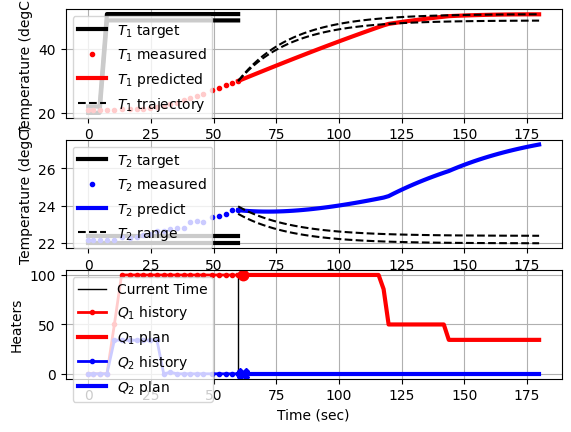

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

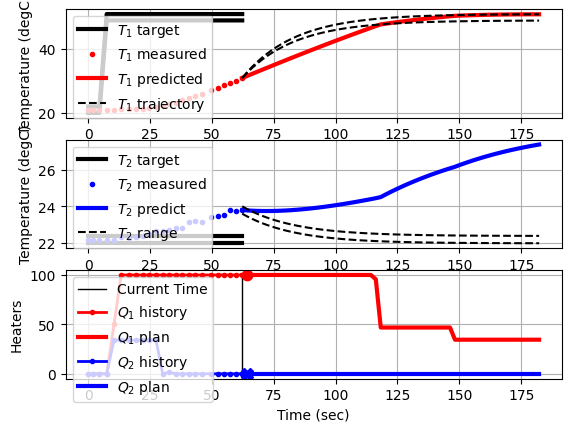

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

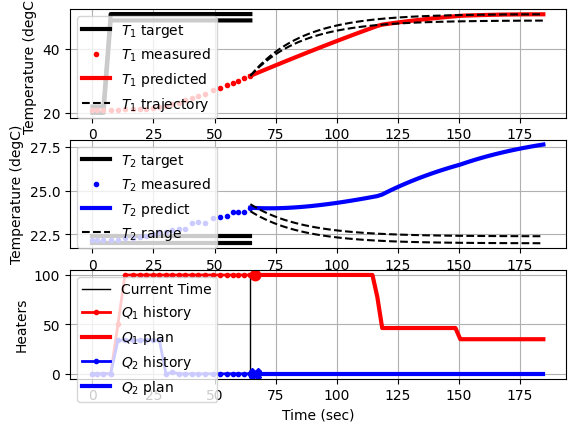

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

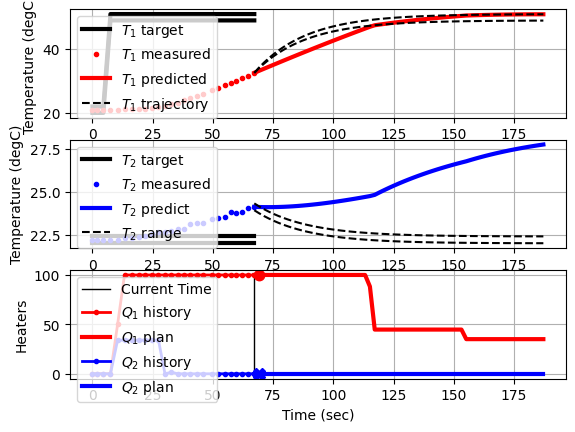

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

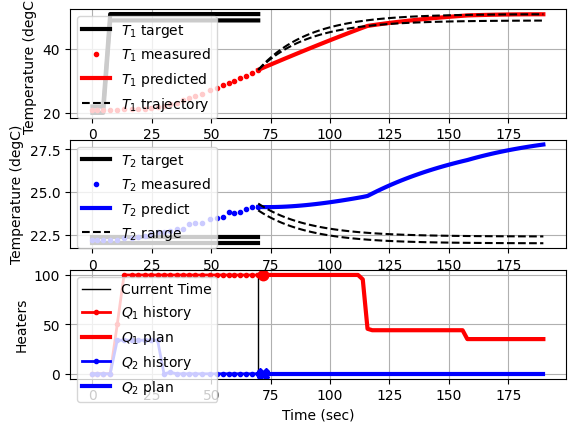

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

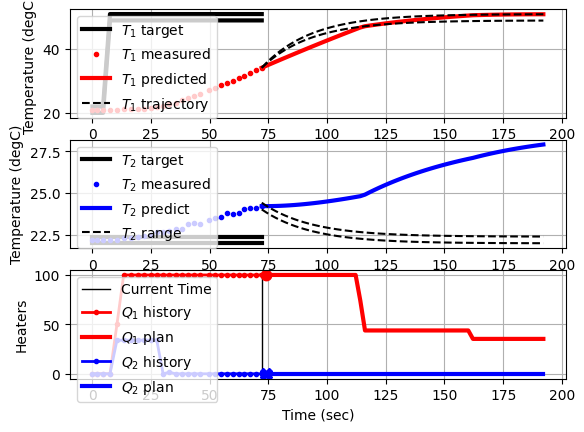

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

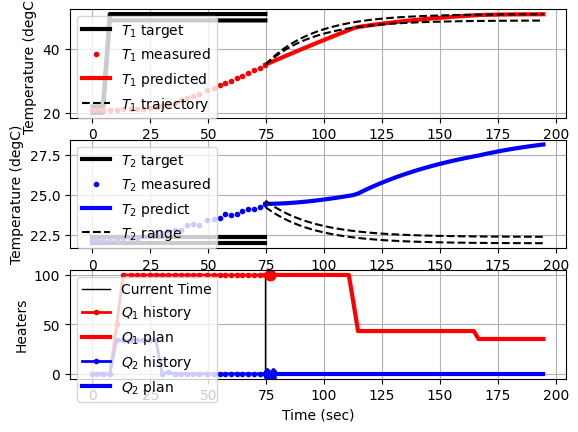

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

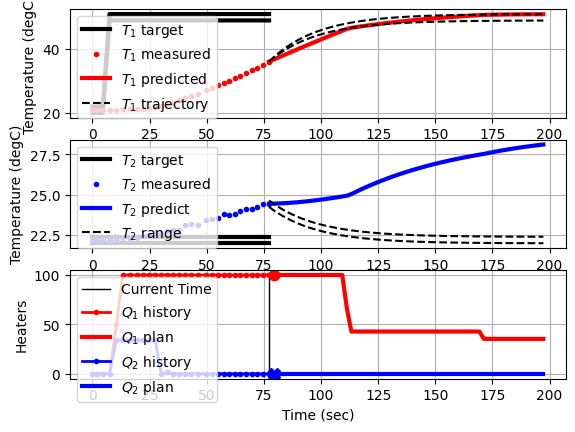

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

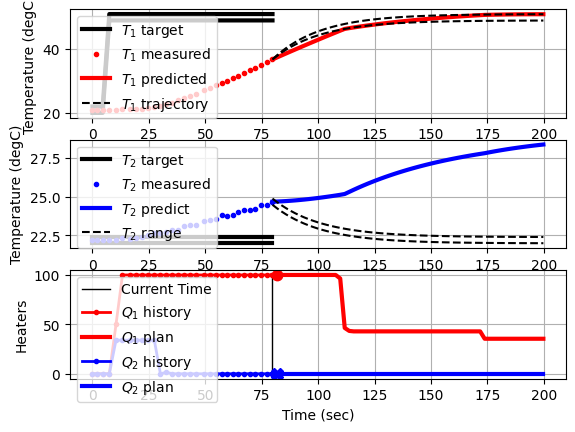

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

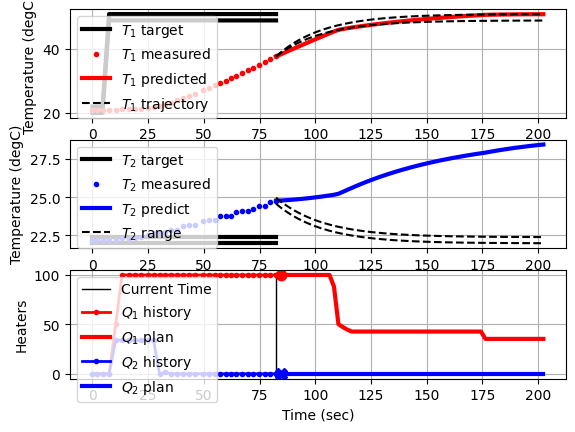

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

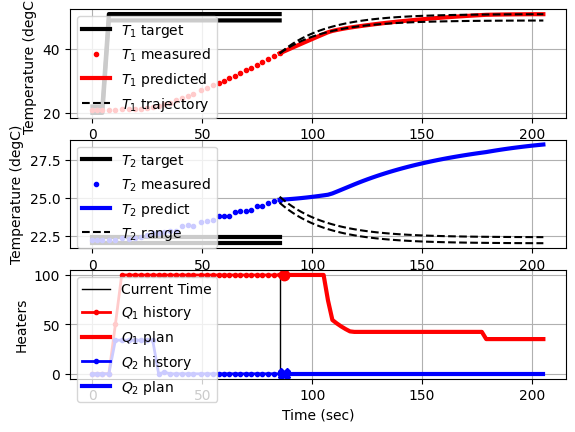

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

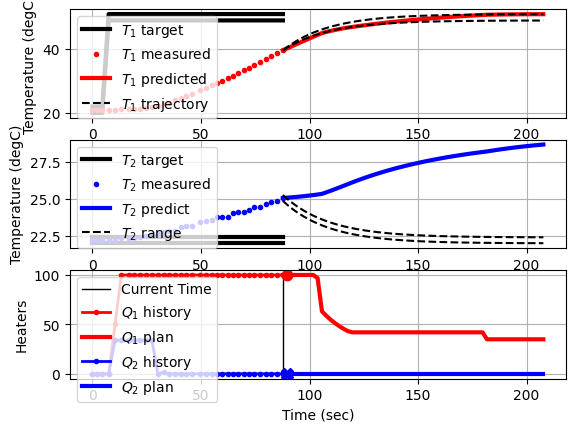

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

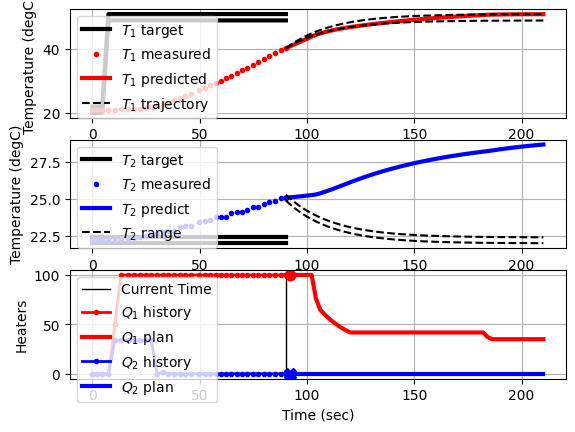

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

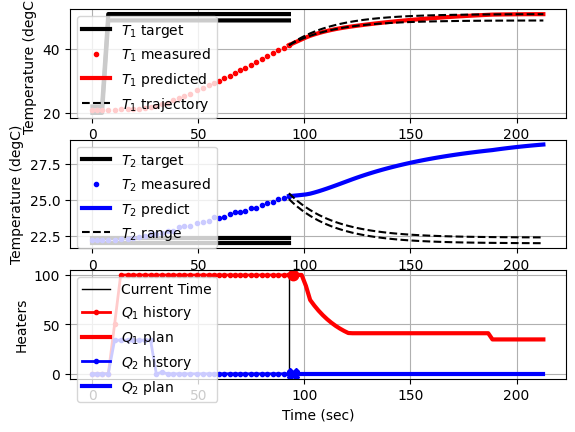

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

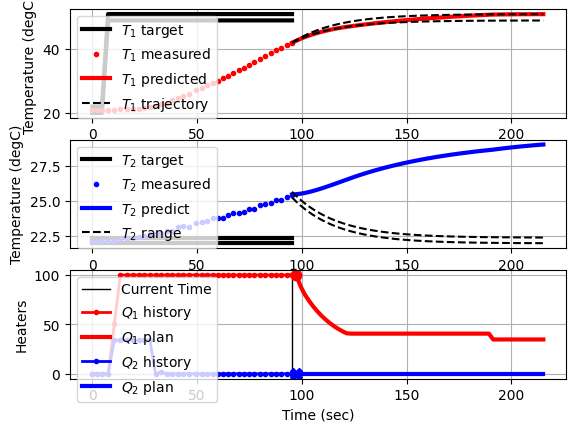

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

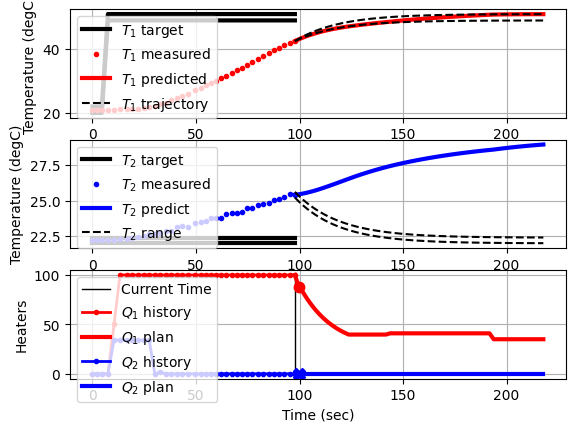

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

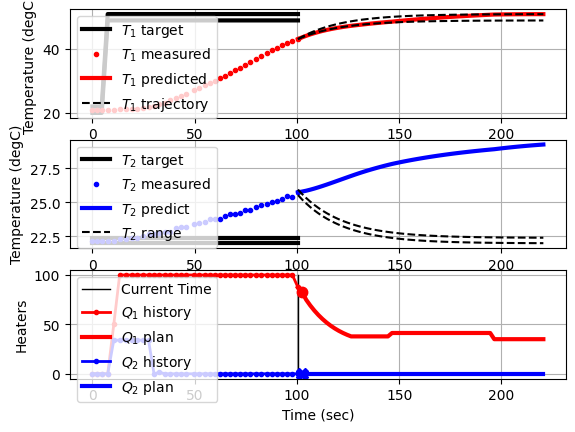

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

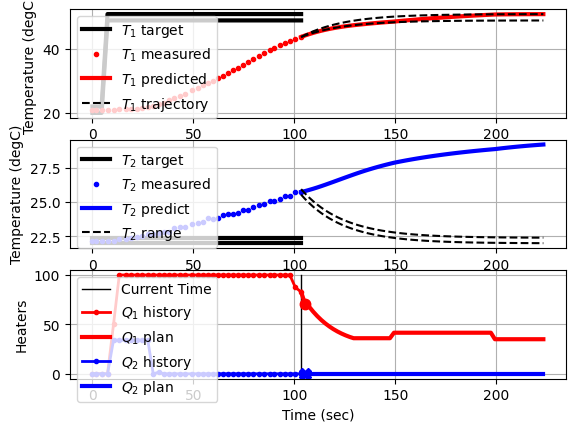

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

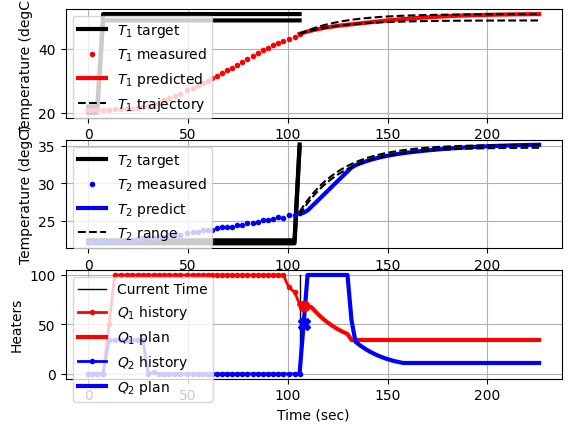

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

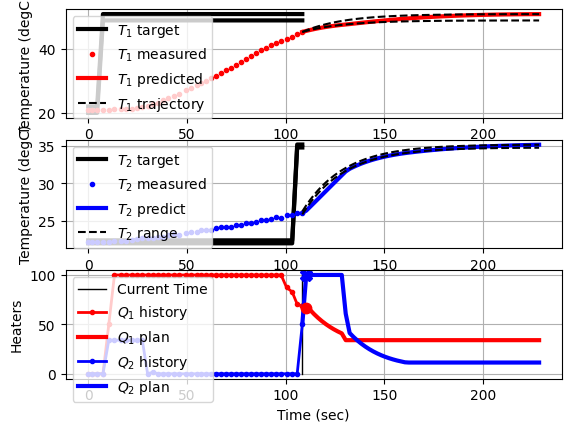

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

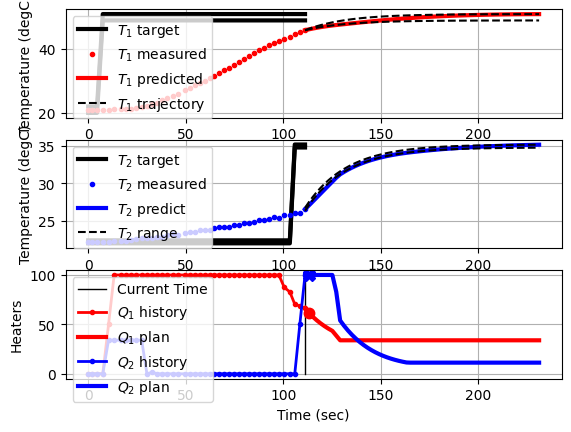

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

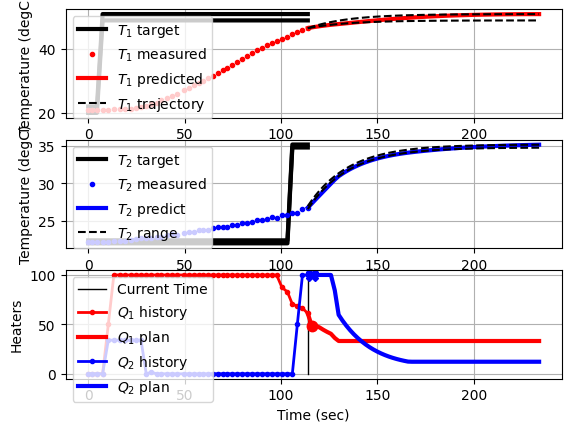

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

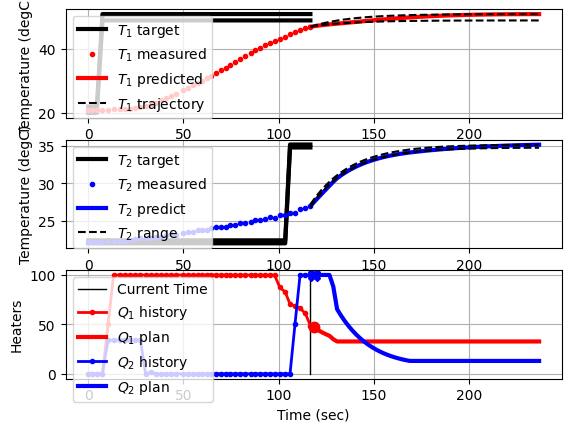

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

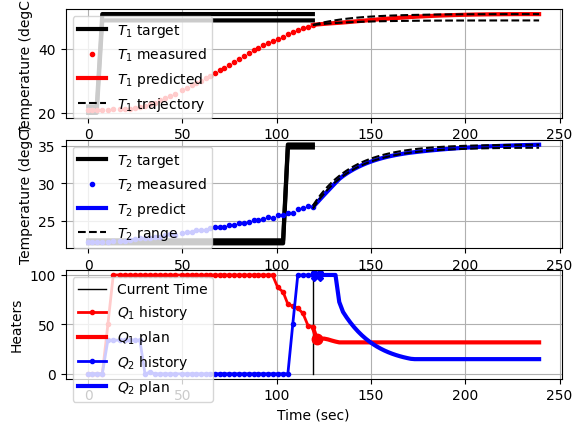

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

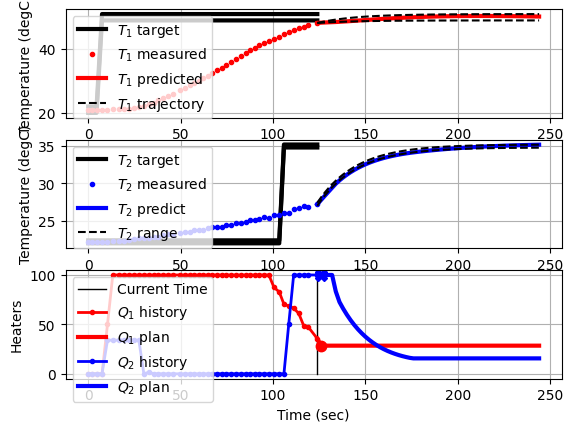

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

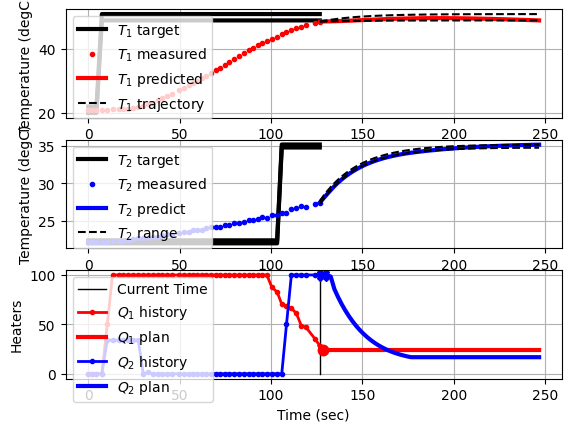

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

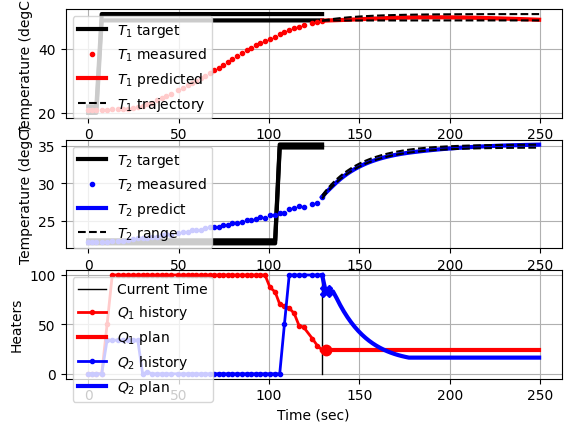

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

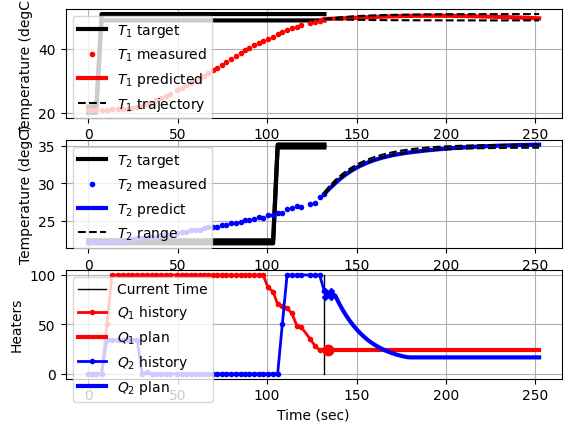

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

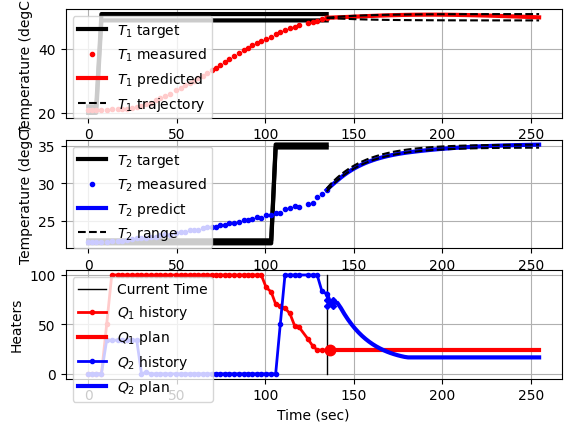

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

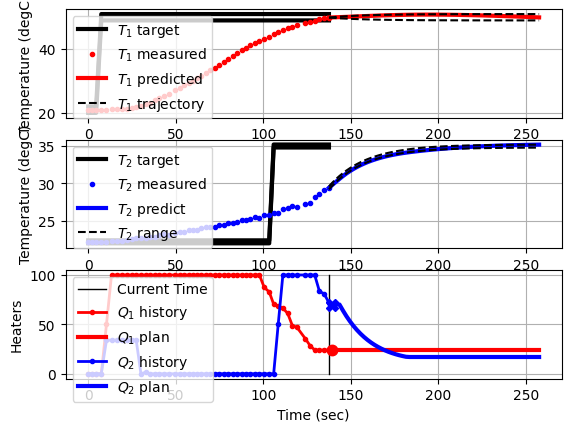

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

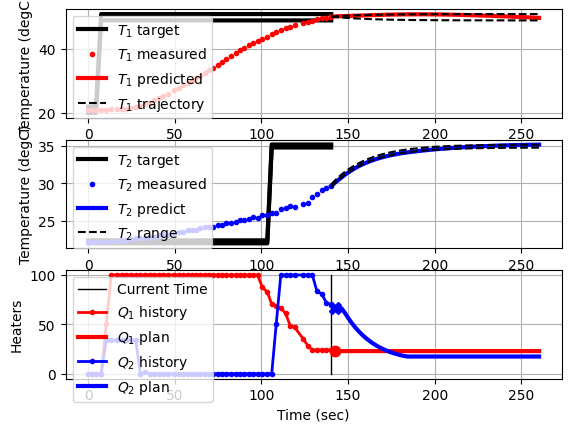

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

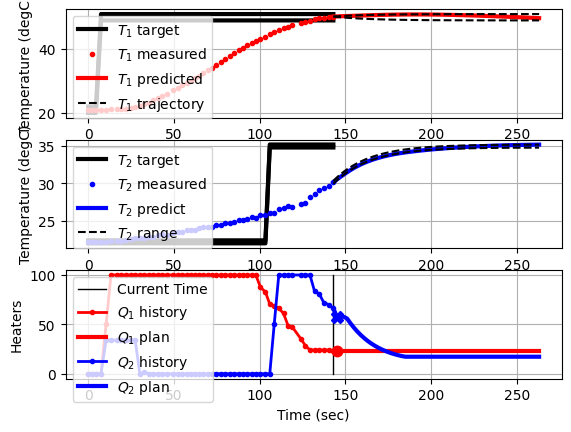

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

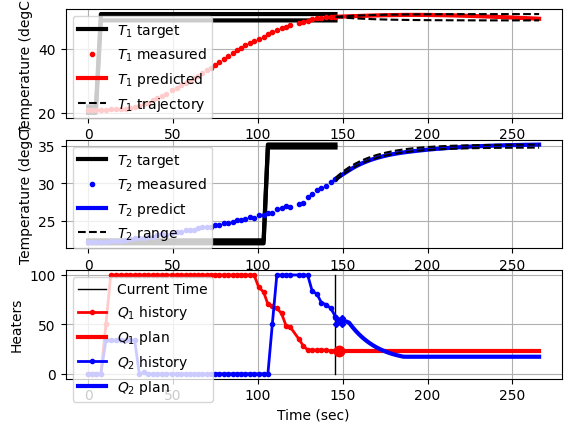

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

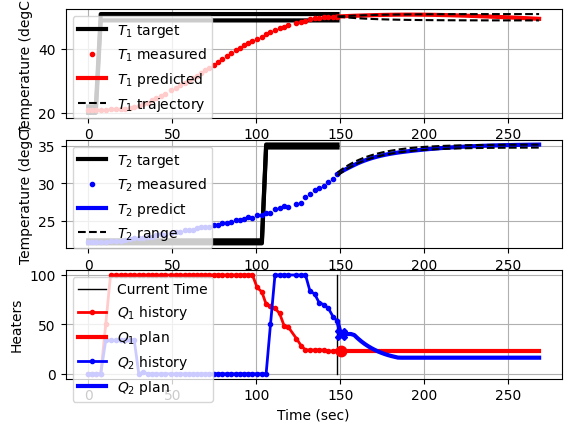

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

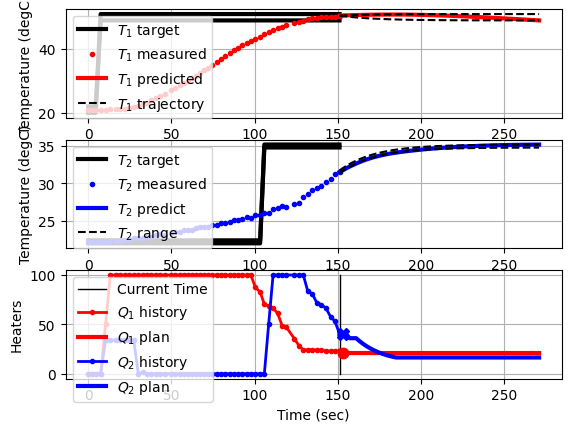

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

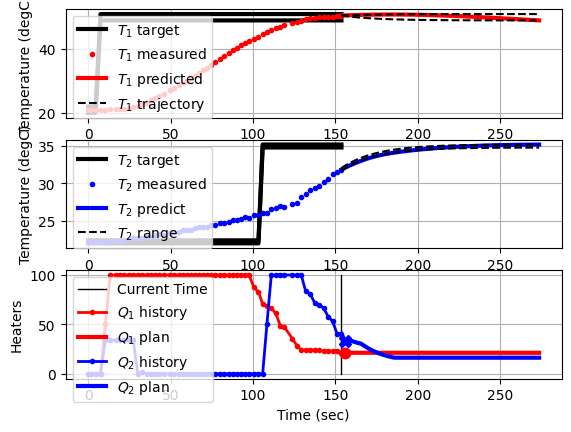

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

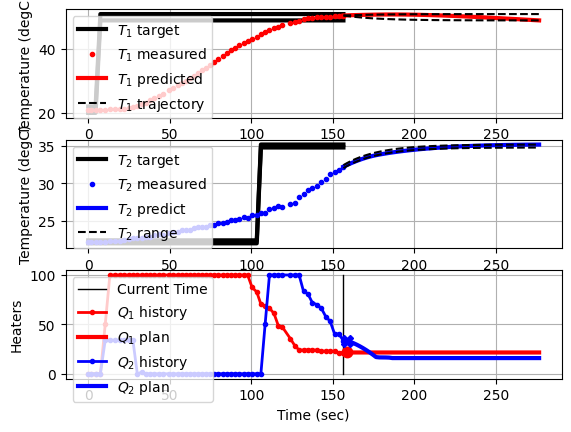

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

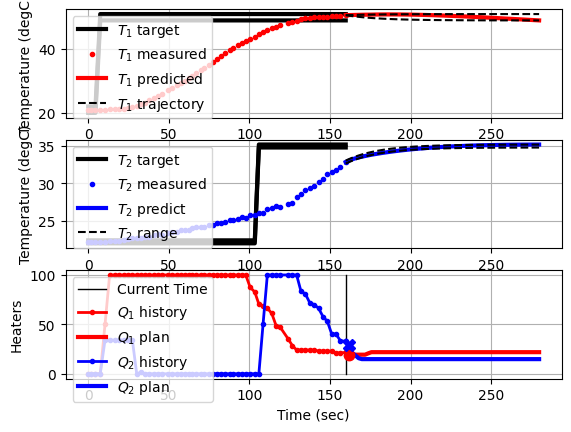

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

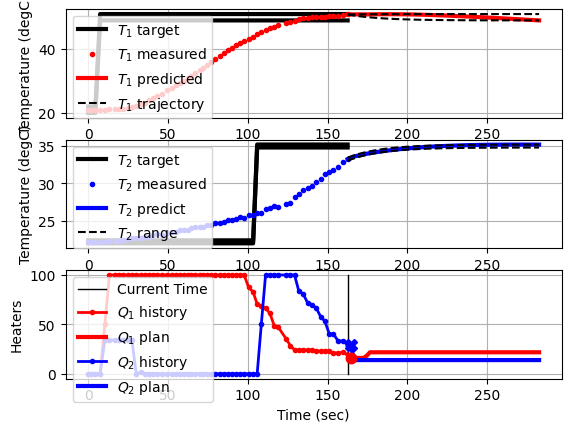

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

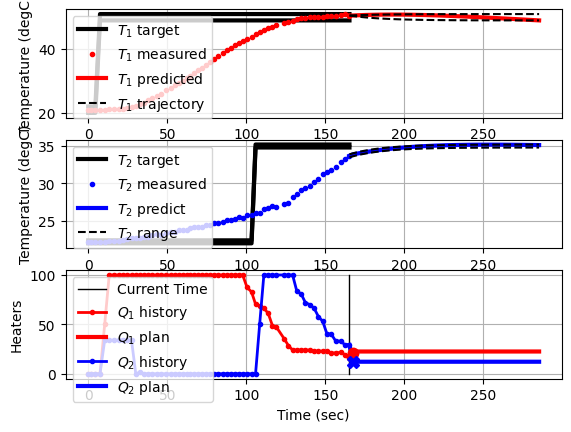

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

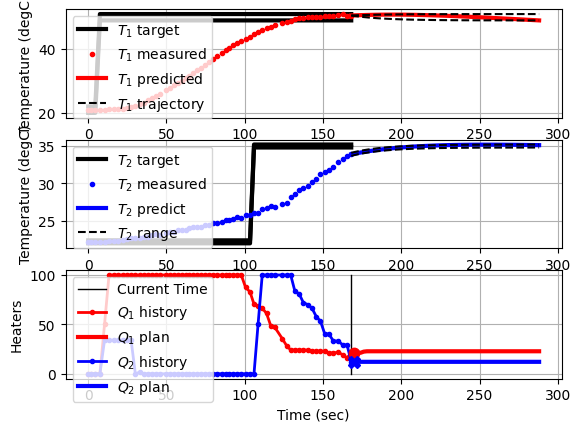

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

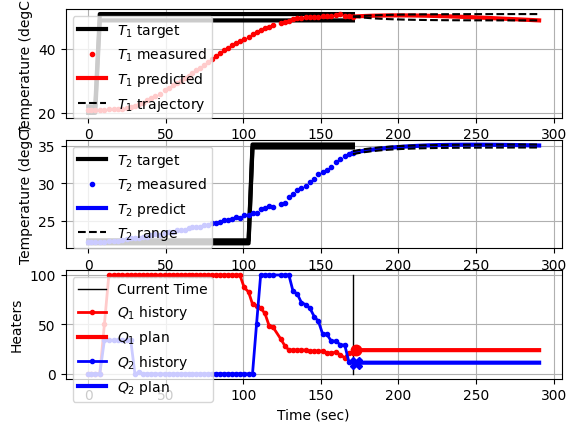

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

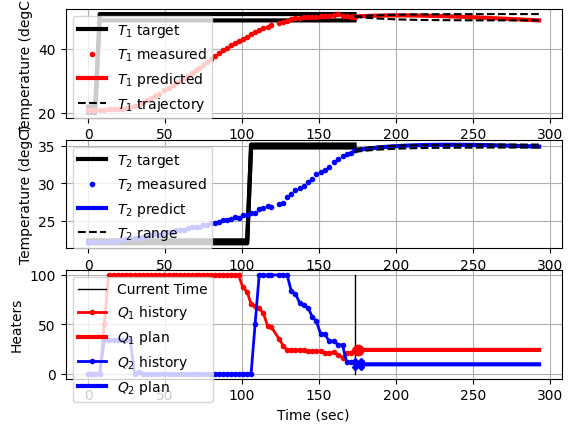

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

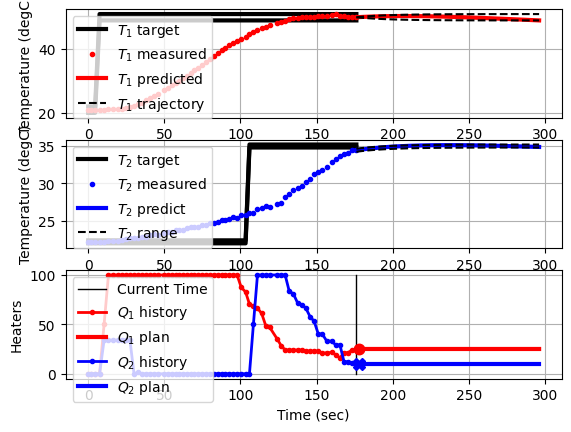

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

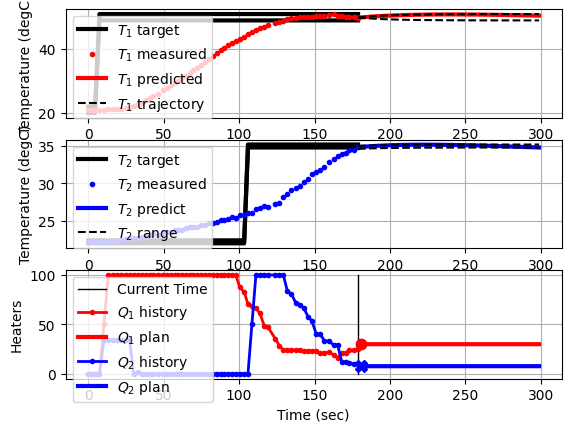

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

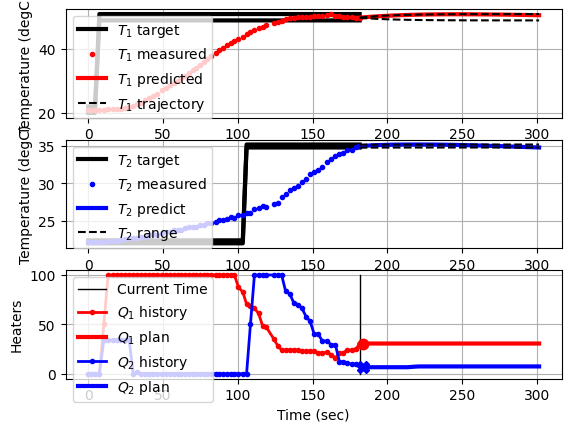

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

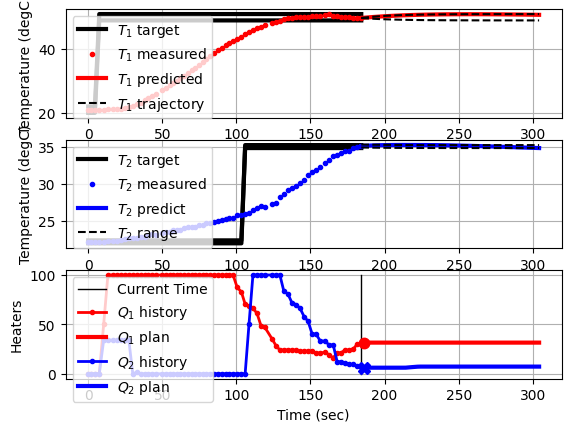

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

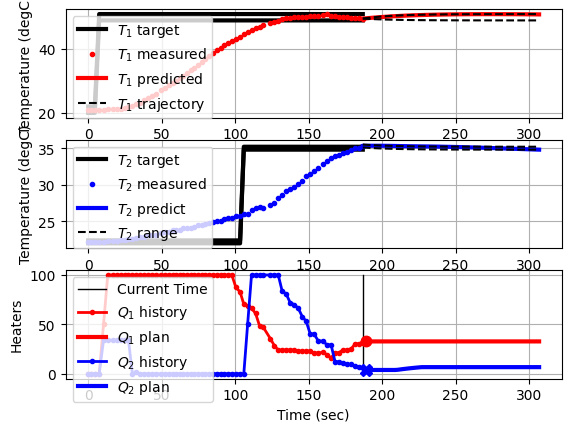

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

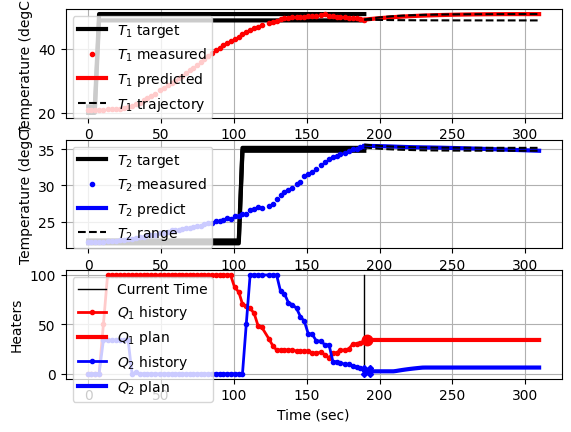

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

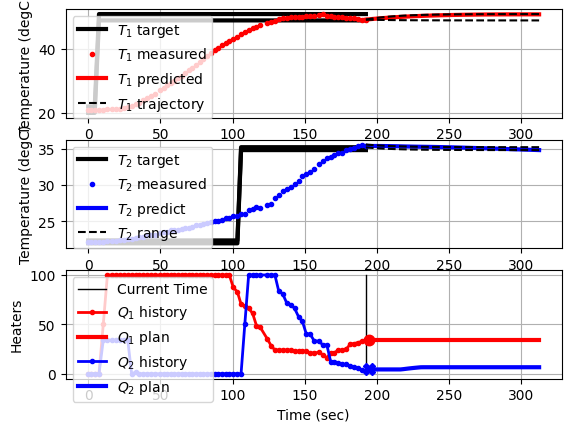

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

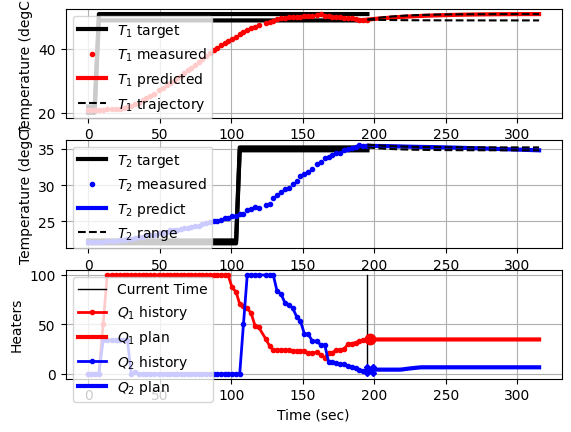

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

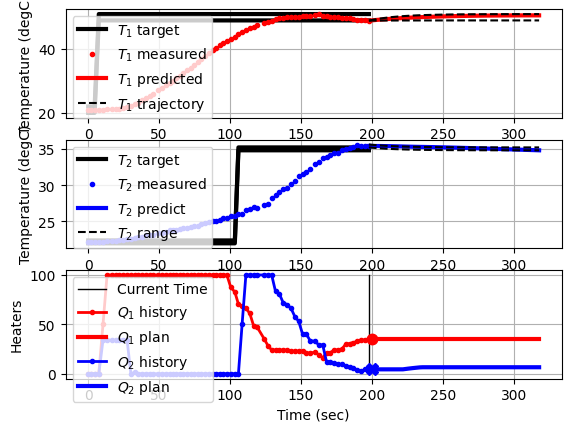

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

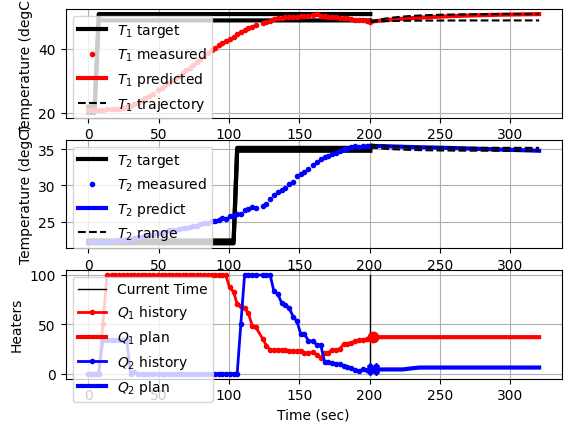

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

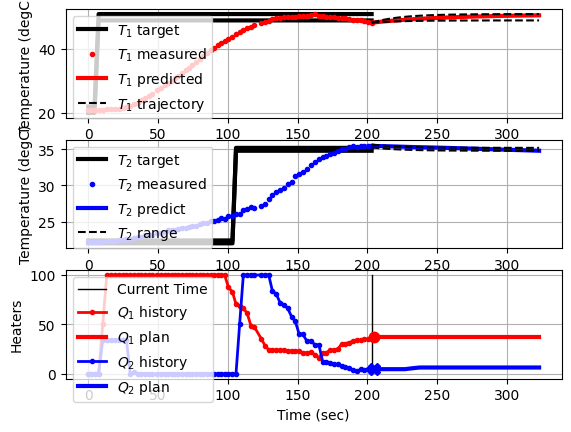

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

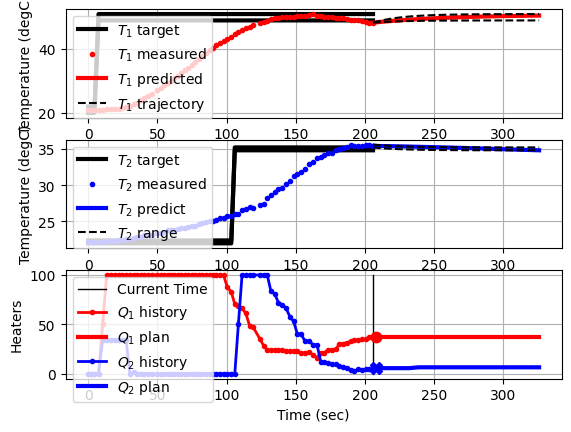

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

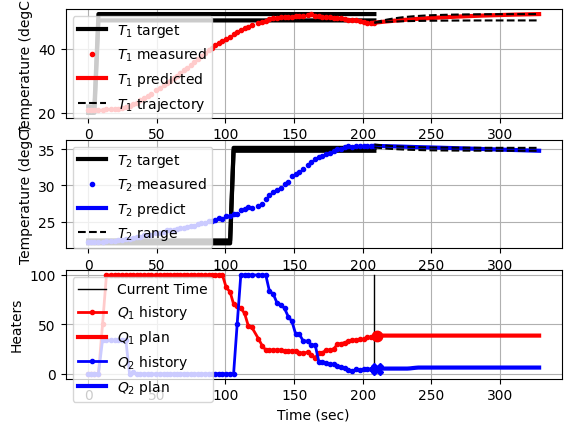

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

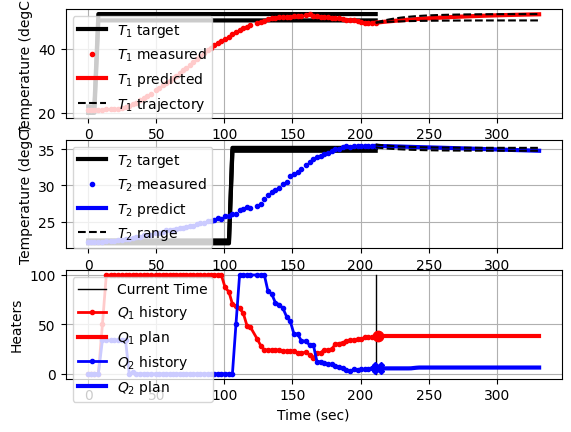

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

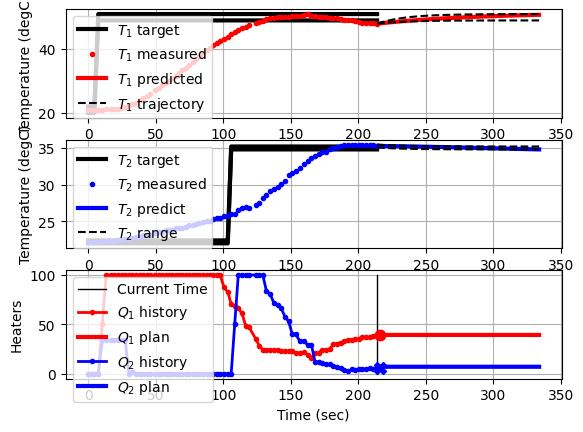

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

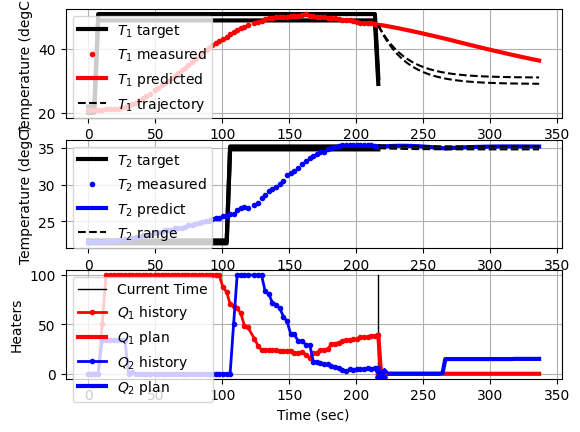

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

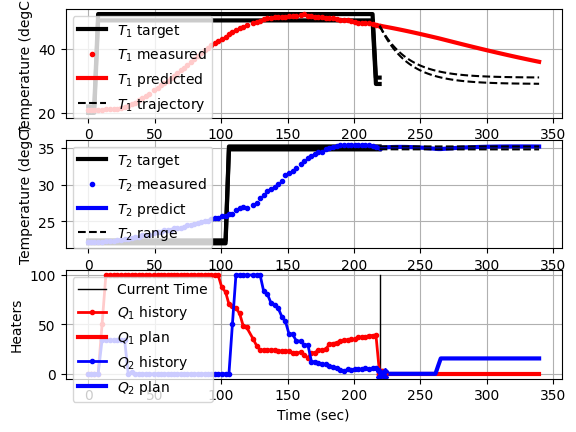

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

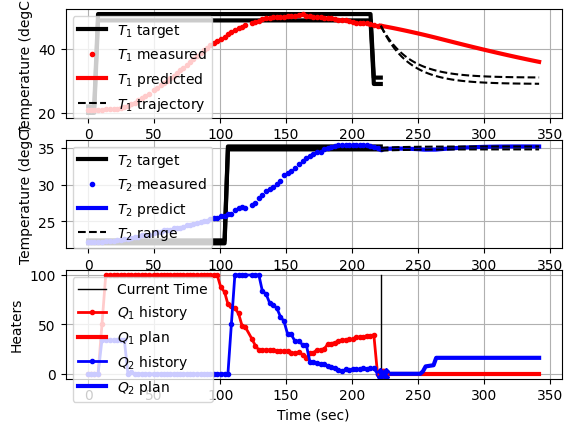

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

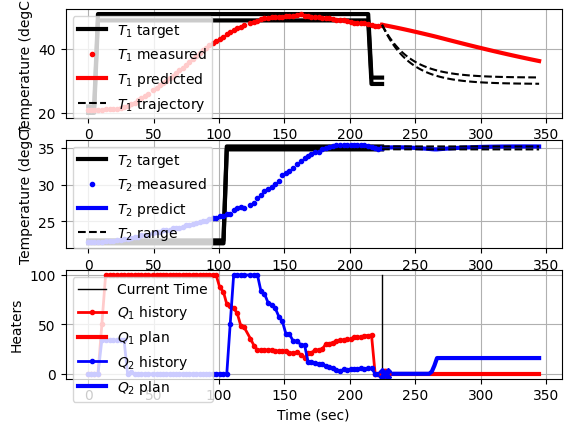

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

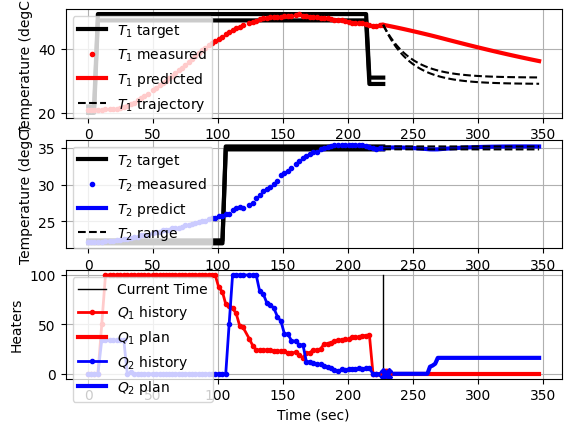

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

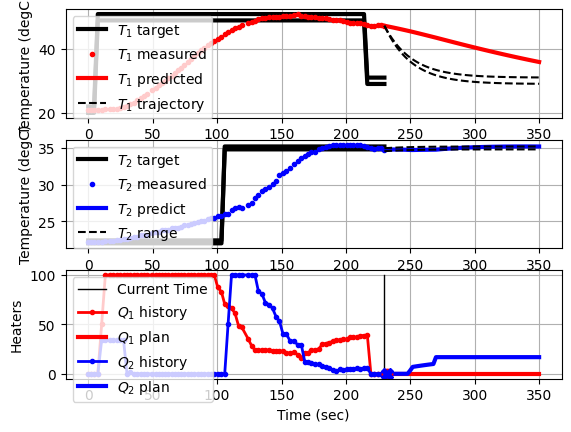

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

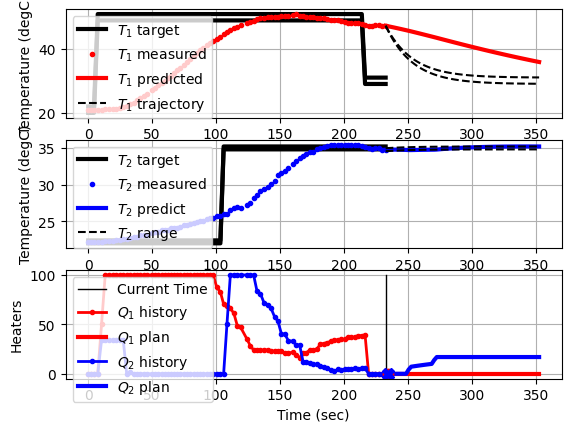

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

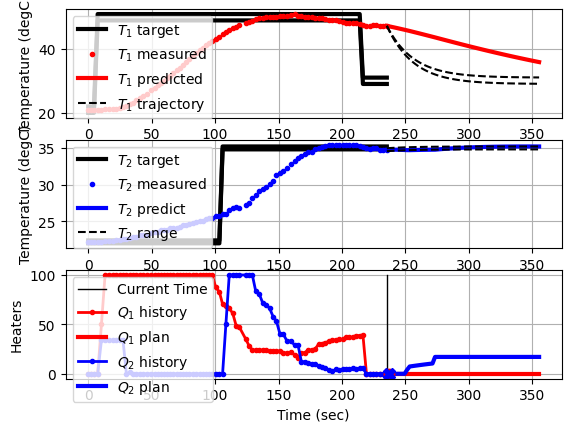

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

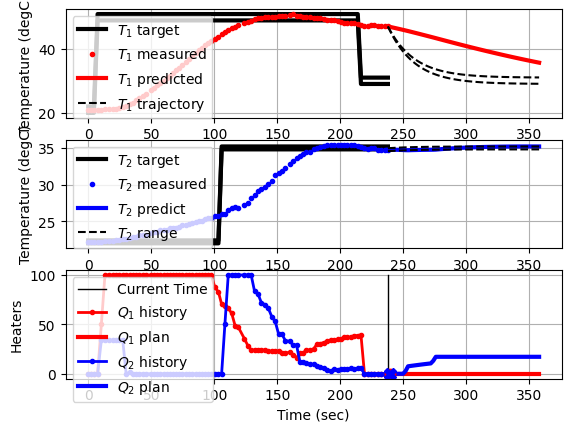

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

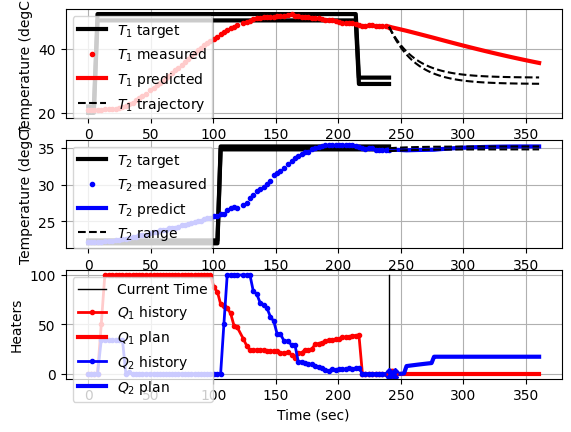

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

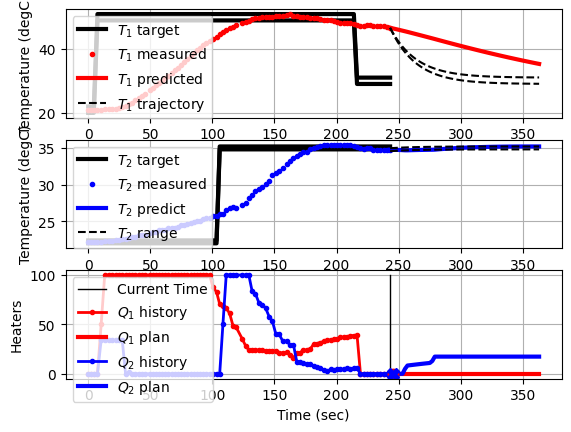

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

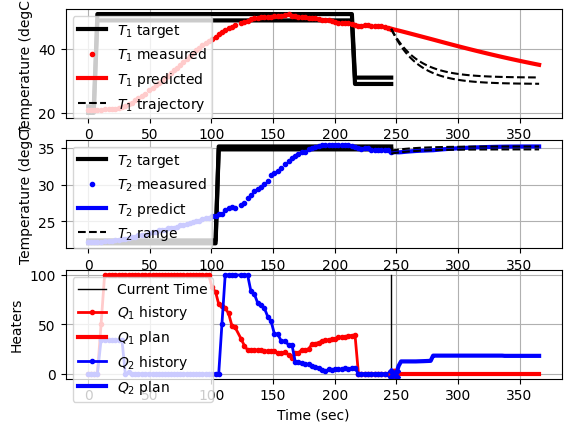

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

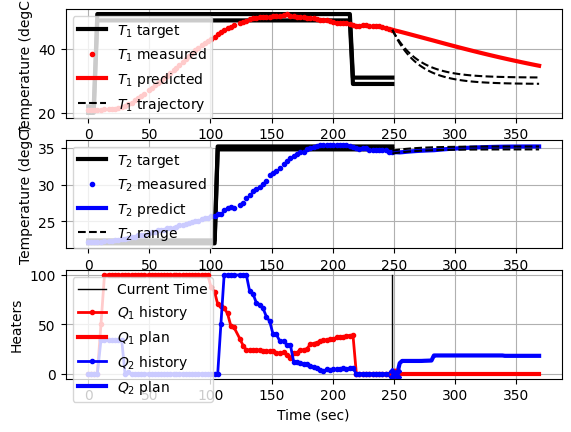

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

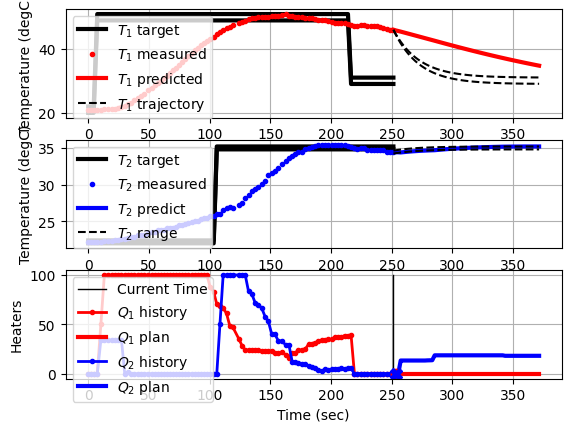

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

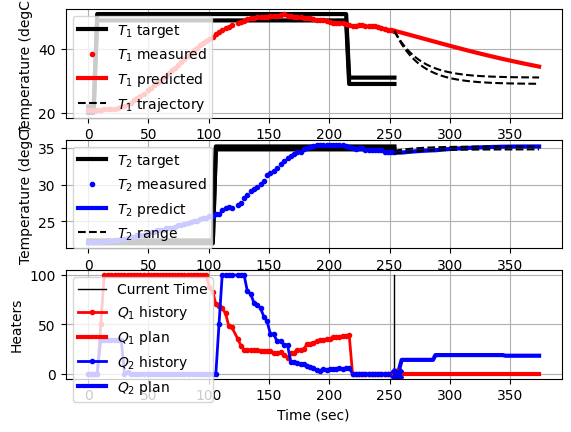

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

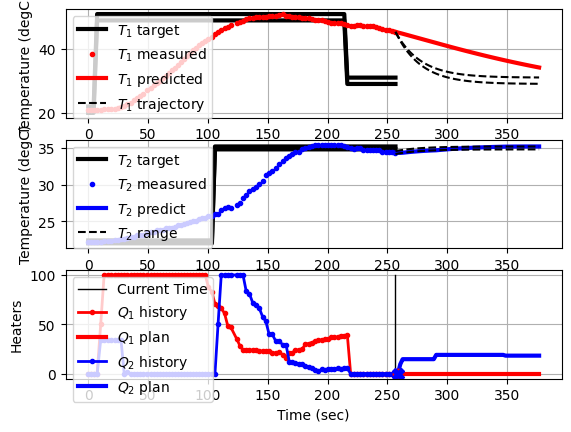

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

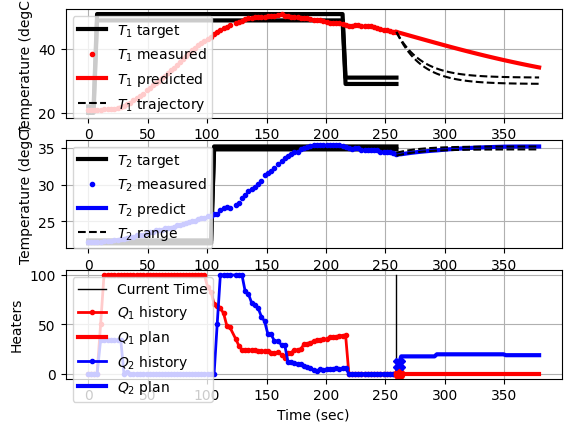

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

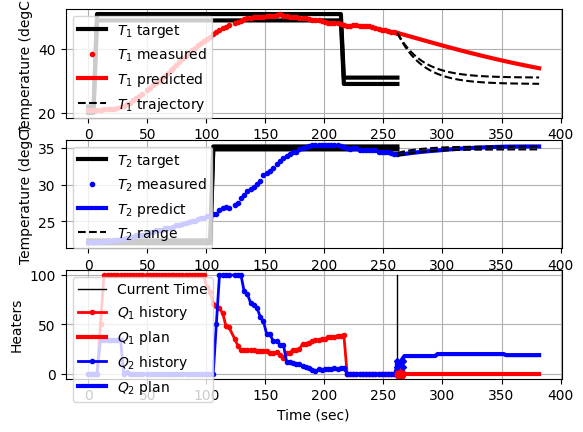

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

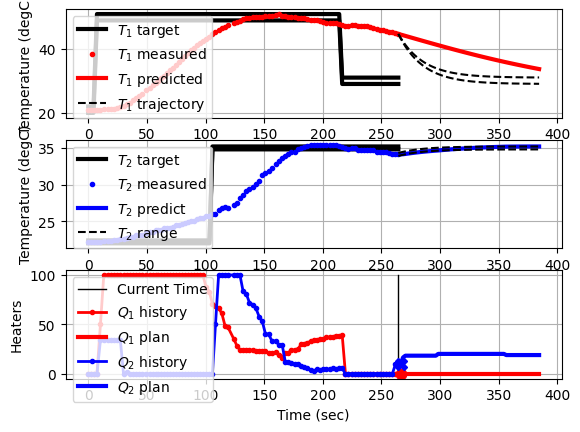

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

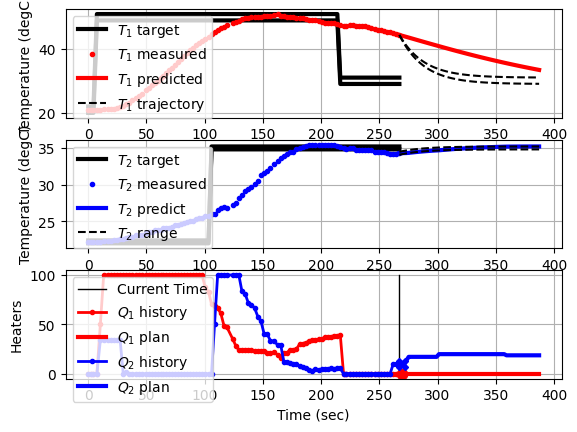

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

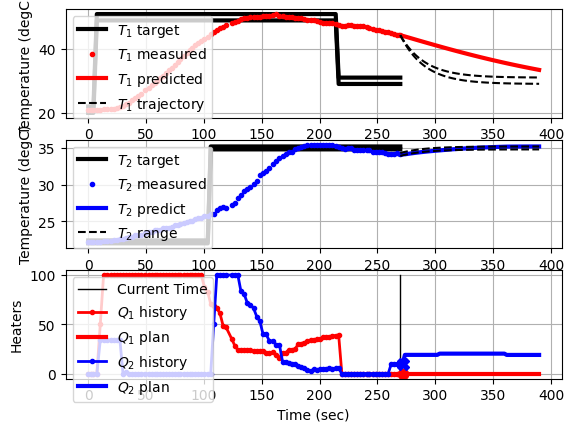

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

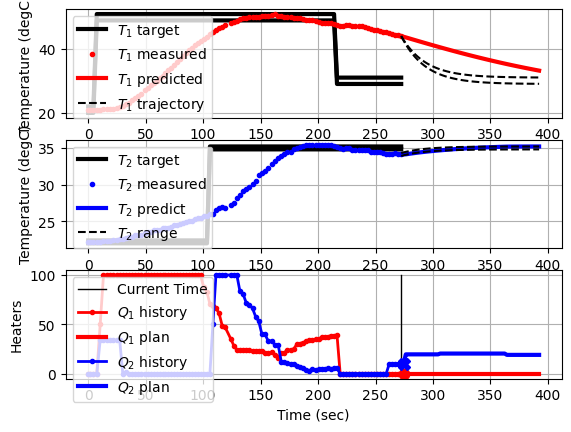

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

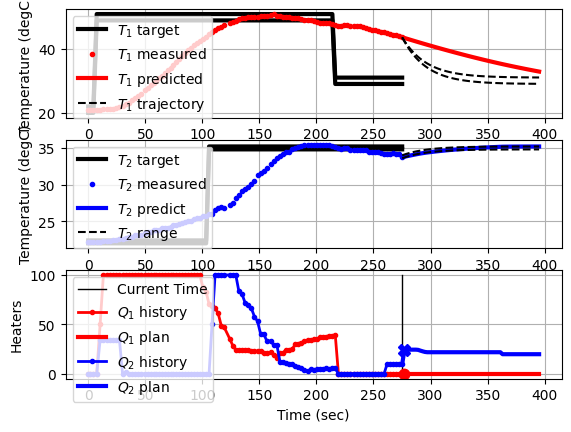

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

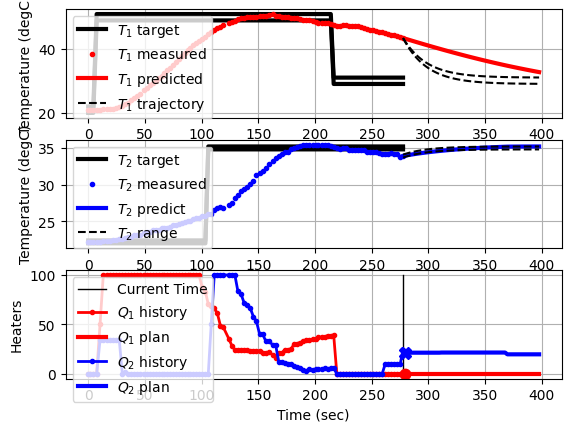

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

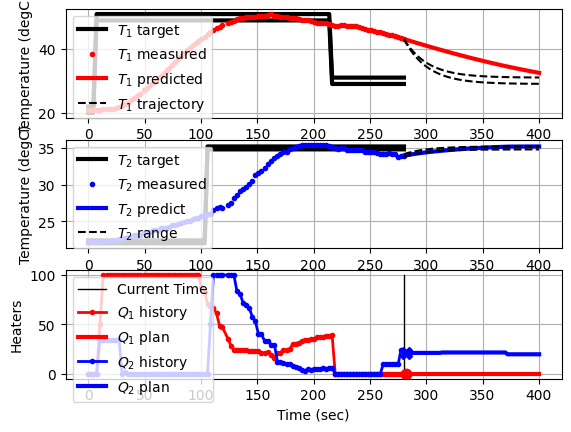

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

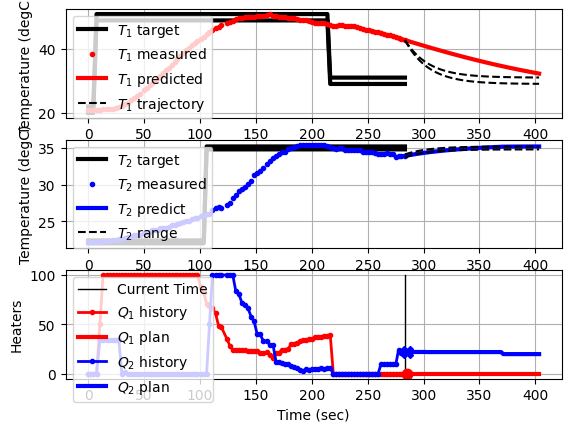

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

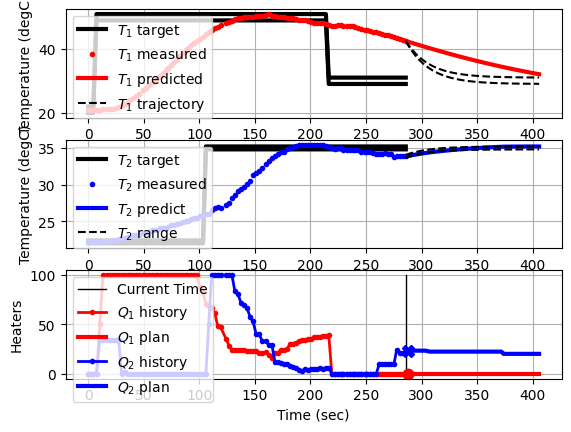

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

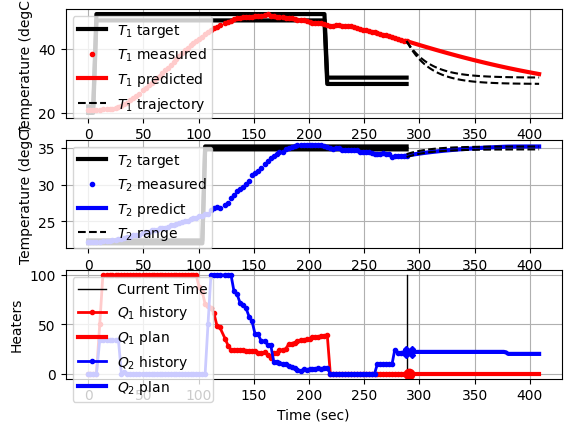

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

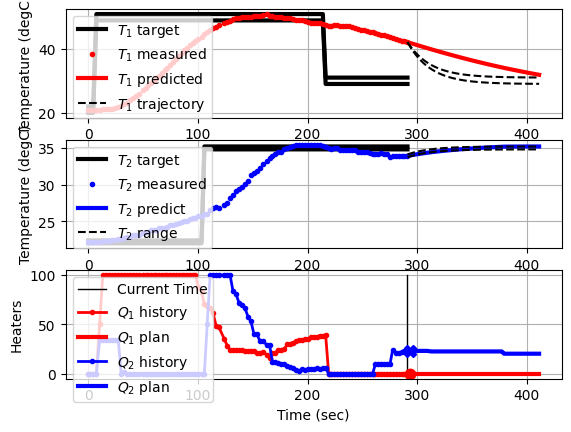

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

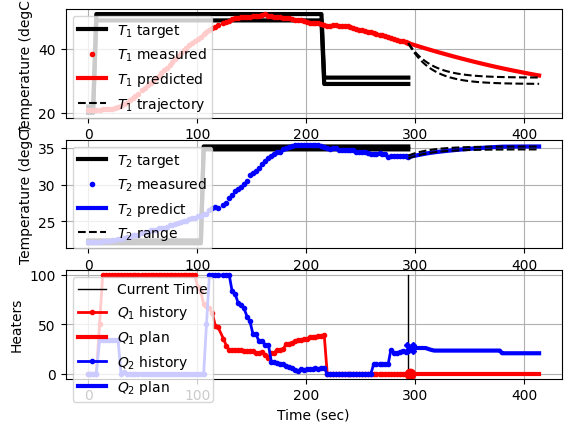

apm 216.21.163.7_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:           2280
 Number of total equations: -         2160
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            120
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

In [7]:
# %load https://apmonitor.com/do/index.php/Main/TCLabF?action=sourceblock&num=4
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython import display
# get gekko package with:
#   pip install gekko
from gekko import GEKKO
# get tclab package with:
#   pip install tclab
from tclab import TCLab, TCLabModel

# Connect to Arduino
a = TCLab()

# Make an MP4 animation?
make_mp4 = False
if make_mp4:
    import imageio  # required to make animation
    import os
    try:
        os.mkdir('./figures')
    except:
        pass

# Final time
tf = 10 # min
# number of data points (every 2 seconds)
n = tf * 30 + 1

# Percent Heater (0-100%)
Q1s = np.zeros(n)
Q2s = np.zeros(n)

# Temperatures (degC)
T1m = a.T1 * np.ones(n)
T2m = a.T2 * np.ones(n)
# Temperature setpoints
T1sp = T1m[0] * np.ones(n)
T2sp = T2m[0] * np.ones(n)

# Heater set point steps about every 150 sec
T1sp[3:] = 50.0
T2sp[40:] = 35.0
T1sp[80:] = 30.0
T2sp[120:] = 50.0
T1sp[160:] = 45.0
T2sp[200:] = 35.0
T1sp[240:] = 60.0

#########################################################
# Initialize Model
#########################################################
# load data (20 min, dt=2 sec) and parse into columns
url = 'http://apmonitor.com/do/uploads/Main/tclab_2sec.txt'
data = pd.read_csv(url)
t = data['Time']
u = data[['H1','H2']]
y = data[['T1','T2']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
print('Identify model')
yp,p,K = m.sysid(t,u,y,na,nb,objf=10000,scale=False,diaglevel=1)

##################################################################
# plot sysid results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,u)
plt.legend([r'$H_1$',r'$H_2$'])
plt.ylabel('MVs')
plt.subplot(2,1,2)
plt.plot(t,y)
plt.plot(t,yp)
plt.legend([r'$T_{1meas}$',r'$T_{2meas}$',\
            r'$T_{1pred}$',r'$T_{2pred}$'])
plt.ylabel('CVs')
plt.xlabel('Time')
plt.savefig('sysid.png')
plt.show()

##################################################################
# create control ARX model
y = m.Array(m.CV,2)
u = m.Array(m.MV,2)
m.arx(p,y,u)

# rename CVs
TC1 = y[0]
TC2 = y[1]

# rename MVs
Q1 = u[0]
Q2 = u[1]

# steady state initialization
m.options.IMODE = 1
m.solve(disp=False)

# set up MPC
m.options.IMODE   = 6 # MPC
m.options.CV_TYPE = 1 # Objective type
m.options.NODES   = 2 # Collocation nodes
m.options.SOLVER  = 3 # IPOPT
m.time=np.linspace(0,120,61)

# Manipulated variables
Q1.STATUS = 1  # manipulated
Q1.FSTATUS = 0 # not measured
Q1.DMAX = 50.0
Q1.DCOST = 0.1
Q1.UPPER = 100.0
Q1.LOWER = 0.0

Q2.STATUS = 1  # manipulated
Q2.FSTATUS = 0 # not measured
Q2.DMAX = 50.0
Q2.DCOST = 0.1
Q2.UPPER = 100.0
Q2.LOWER = 0.0

# Controlled variables
TC1.STATUS = 1     # drive to set point
TC1.FSTATUS = 1    # receive measurement
TC1.TAU = 20       # response speed (time constant)
TC1.TR_INIT = 2    # reference trajectory
TC1.TR_OPEN = 0

TC2.STATUS = 1     # drive to set point
TC2.FSTATUS = 1    # receive measurement
TC2.TAU = 20        # response speed (time constant)
TC2.TR_INIT = 2    # dead-band
TC2.TR_OPEN = 1

##################################################################
# Create plot
plt.figure(figsize=(10,7))
plt.ion()
plt.show()

# Main Loop
start_time = time.time()
prev_time = start_time
tm = np.zeros(n)

try:
    for i in range(1,n-1):
        m.REQCTRLMODE=2

        # Sleep time
        sleep_max = 2.0
        sleep = sleep_max - (time.time() - prev_time)
        if sleep>=0.01:
            time.sleep(sleep-0.01)
        else:
            time.sleep(0.01)

        # Record time and change in time
        t = time.time()
        dt = t - prev_time
        prev_time = t
        tm[i] = t - start_time

        # Read temperatures in Celsius 
        T1m[i] = a.T1
        T2m[i] = a.T2

        # Insert measurements
        TC1.MEAS = T1m[i]
        TC2.MEAS = T2m[i]

        # Adjust setpoints
        db1 = 1.0 # dead-band
        TC1.SPHI = T1sp[i] + db1
        TC1.SPLO = T1sp[i] - db1

        db2 = 0.2
        TC2.SPHI = T2sp[i] + db2
        TC2.SPLO = T2sp[i] - db2

        # Adjust heaters with MPC
        m.solve() 

        if m.options.APPSTATUS == 1:
            # Retrieve new values
            Q1s[i+1]  = Q1.NEWVAL
            Q2s[i+1]  = Q2.NEWVAL
            # get additional solution information
            with open(m.path+'//results.json') as f:
                results = json.load(f)
        else:
            # Solution failed
            Q1s[i+1]  = 0.0
            Q2s[i+1]  = 0.0

        # Write new heater values (0-100)
        a.Q1(Q1s[i])
        a.Q2(Q2s[i])

        # Plot
        plt.clf()
        ax=plt.subplot(3,1,1)
        ax.grid()
        plt.plot(tm[0:i+1],T1sp[0:i+1]+db1,'k-',\
                 label=r'$T_1$ target',lw=3)
        plt.plot(tm[0:i+1],T1sp[0:i+1]-db1,'k-',\
                 label=None,lw=3)
        plt.plot(tm[0:i+1],T1m[0:i+1],'r.',label=r'$T_1$ measured')
        plt.plot(tm[i]+m.time,results['v1.bcv'],'r-',\
                 label=r'$T_1$ predicted',lw=3)
        plt.plot(tm[i]+m.time,results['v1.tr_hi'],'k--',\
                 label=r'$T_1$ trajectory')
        plt.plot(tm[i]+m.time,results['v1.tr_lo'],'k--')
        plt.ylabel('Temperature (degC)')
        plt.legend(loc=2)
        ax=plt.subplot(3,1,2)
        ax.grid()        
        plt.plot(tm[0:i+1],T2sp[0:i+1]+db2,'k-',\
                 label=r'$T_2$ target',lw=3)
        plt.plot(tm[0:i+1],T2sp[0:i+1]-db2,'k-',\
                 label=None,lw=3)
        plt.plot(tm[0:i+1],T2m[0:i+1],'b.',label=r'$T_2$ measured')
        plt.plot(tm[i]+m.time,results['v2.bcv'],'b-',\
                 label=r'$T_2$ predict',lw=3)
        plt.plot(tm[i]+m.time,results['v2.tr_hi'],'k--',\
                 label=r'$T_2$ range')
        plt.plot(tm[i]+m.time,results['v2.tr_lo'],'k--')
        plt.ylabel('Temperature (degC)')
        plt.legend(loc=2)
        ax=plt.subplot(3,1,3)
        ax.grid()
        plt.plot([tm[i],tm[i]],[0,100],'k-',\
                 label='Current Time',lw=1)
        plt.plot(tm[0:i+1],Q1s[0:i+1],'r.-',\
                 label=r'$Q_1$ history',lw=2)
        plt.plot(tm[i]+m.time,Q1.value,'r-',\
                 label=r'$Q_1$ plan',lw=3)
        plt.plot(tm[0:i+1],Q2s[0:i+1],'b.-',\
                 label=r'$Q_2$ history',lw=2)
        plt.plot(tm[i]+m.time,Q2.value,'b-',
                 label=r'$Q_2$ plan',lw=3)
        plt.plot(tm[i]+m.time[1],Q1.value[1],color='red',\
                 marker='.',markersize=15)
        plt.plot(tm[i]+m.time[1],Q2.value[1],color='blue',\
                 marker='X',markersize=8)
        plt.ylabel('Heaters')
        plt.xlabel('Time (sec)')
        plt.legend(loc=2)
        plt.draw()
        plt.pause(0.05)
        #
        if make_mp4:
            filename='./figures/plot_'+str(i+10000)+'.png'
            plt.savefig(filename)

    # Turn off heaters and close connection
    a.Q1(0)
    a.Q2(0)
    a.close()
    # Save figure
    plt.savefig('tclab_mpc.png')

    # generate mp4 from png figures in batches of 350
    if make_mp4:
        images = []
        iset = 0
        for i in range(1,n-1):
            filename='./figures/plot_'+str(i+10000)+'.png'
            images.append(imageio.imread(filename))
            if ((i+1)%350)==0:
                imageio.mimsave('results_'+str(iset)+'.mp4', images)
                iset += 1
                images = []
        if images!=[]:
            imageio.mimsave('results_'+str(iset)+'.mp4', images)

# Allow user to end loop with Ctrl-C           
except KeyboardInterrupt:
    # Turn off heaters and close connection
    a.Q1(0)
    a.Q2(0)
    a.close()
    print('Shutting down')
    plt.savefig('tclab_mpc.png')

# Make sure serial connection still closes when there's an error
except:           
    # Disconnect from Arduinoiiiii
    a.Q1(0)
    a.Q2(0)
    a.close()
    print('Error: Shutting down')
    plt.savefig('tclab_mpc.png')
    raise